# 📊 Khám Phá Dữ Liệu (Exploratory Data Analysis)

## Mục tiêu:
- Hiểu cấu trúc và đặc điểm của dataset đột quỵ
- Phân tích phân bố các biến
- Tìm hiểu mối tương quan giữa các yếu tố
- Xác định các yếu tố nguy cơ chính gây đột quỵ

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Tải và Khám Phá Dữ Liệu Cơ Bản

In [2]:
# Tải dữ liệu
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv.xls')

# Thông tin cơ bản về dataset
print("📋 THÔNG TIN CƠ BẢN VỀ DATASET")
print(f"Kích thước dataset: {df.shape}")
print(f"Số dòng: {df.shape[0]:,}")
print(f"Số cột: {df.shape[1]}")
print("\n" + "="*50)

# Hiển thị 5 dòng đầu
print("\n🔍 5 DÒNG ĐẦU TIÊN:")
df.head()

📋 THÔNG TIN CƠ BẢN VỀ DATASET
Kích thước dataset: (5110, 12)
Số dòng: 5,110
Số cột: 12


🔍 5 DÒNG ĐẦU TIÊN:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Thông tin chi tiết về các cột
print("📊 THÔNG TIN CHI TIẾT VỀ CÁC CỘT:")
df.info()

print("\n📈 THỐNG KÊ MÔ TẢ:")
df.describe()

📊 THÔNG TIN CHI TIẾT VỀ CÁC CỘT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

📈 THỐNG KÊ MÔ TẢ:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 2. Phân Tích Biến Mục Tiêu (Stroke)

🎯 PHÂN BỐ BIẾN MỤC TIÊU (STROKE):
Không đột quỵ (0): 4,861 ca (95.13%)
Đột quỵ (1): 249 ca (4.87%)
Tỷ lệ mất cân bằng: 1:19.5


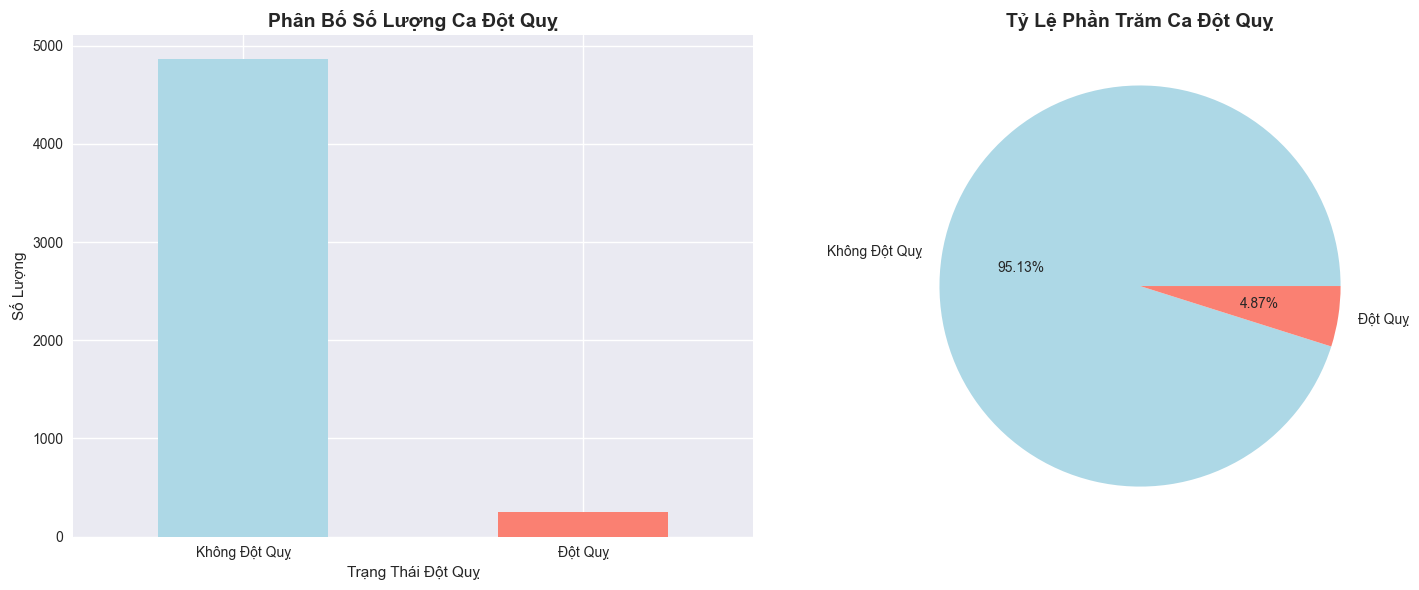

In [4]:
# Phân bố biến mục tiêu
stroke_counts = df['stroke'].value_counts()
stroke_pct = df['stroke'].value_counts(normalize=True) * 100

print("🎯 PHÂN BỐ BIẾN MỤC TIÊU (STROKE):")
print(f"Không đột quỵ (0): {stroke_counts[0]:,} ca ({stroke_pct[0]:.2f}%)")
print(f"Đột quỵ (1): {stroke_counts[1]:,} ca ({stroke_pct[1]:.2f}%)")
print(f"Tỷ lệ mất cân bằng: 1:{stroke_counts[0]/stroke_counts[1]:.1f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
stroke_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_title('Phân Bố Số Lượng Ca Đột Quỵ', fontsize=14, fontweight='bold')
ax1.set_xlabel('Trạng Thái Đột Quỵ')
ax1.set_ylabel('Số Lượng')
ax1.set_xticklabels(['Không Đột Quỵ', 'Đột Quỵ'], rotation=0)

# Pie chart
ax2.pie(stroke_counts.values, labels=['Không Đột Quỵ', 'Đột Quỵ'], 
        autopct='%1.2f%%', colors=['lightblue', 'salmon'])
ax2.set_title('Tỷ Lệ Phần Trăm Ca Đột Quỵ', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Phân Tích Các Biến Phân Loại

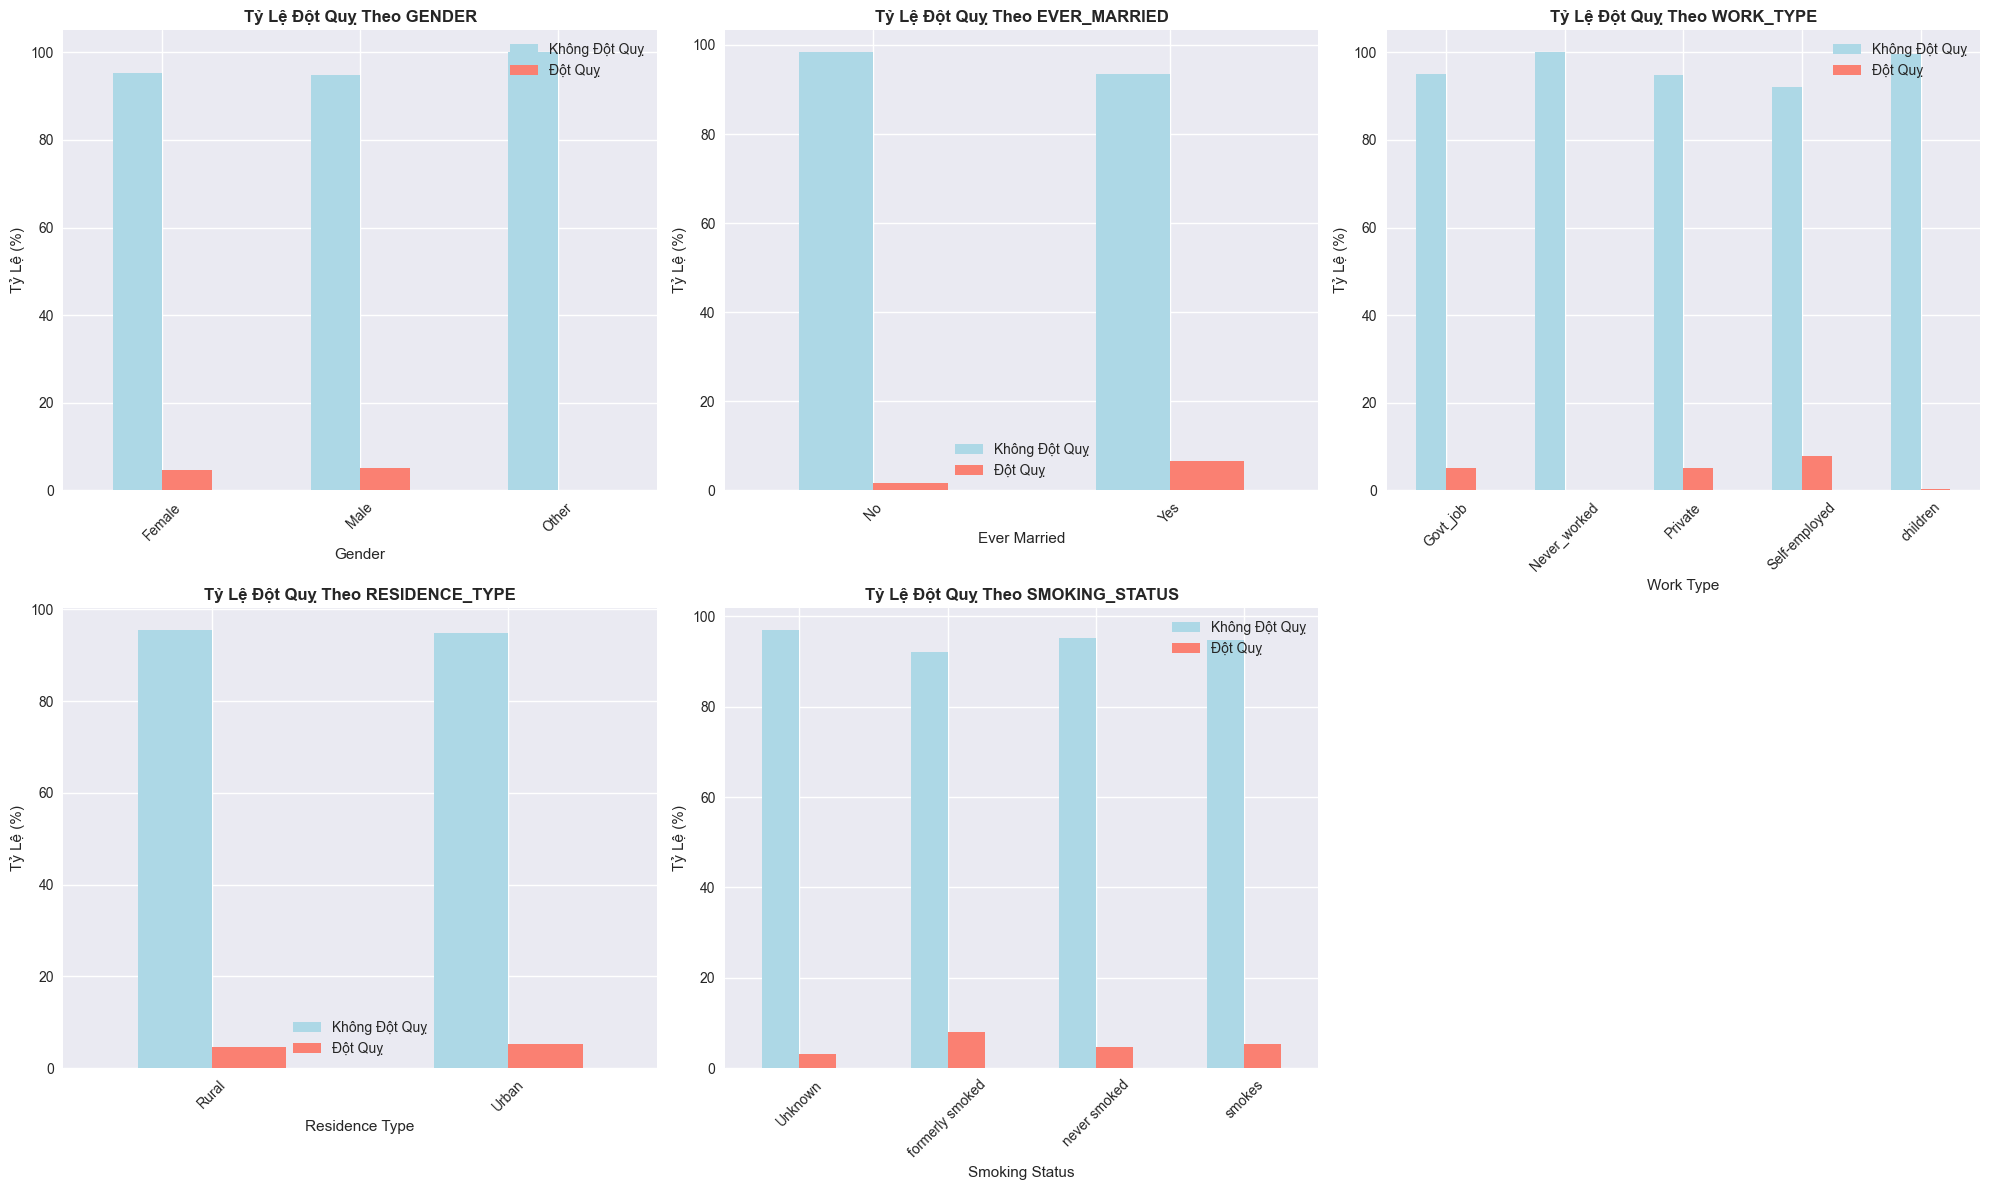

In [5]:
# Danh sách các biến phân loại
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Tạo subplot cho các biến phân loại
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Tạo crosstab
    ct = pd.crosstab(df[col], df['stroke'], normalize='index') * 100
    
    # Vẽ biểu đồ
    ct.plot(kind='bar', ax=axes[i], color=['lightblue', 'salmon'])
    axes[i].set_title(f'Tỷ Lệ Đột Quỵ Theo {col.upper()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Tỷ Lệ (%)')
    axes[i].legend(['Không Đột Quỵ', 'Đột Quỵ'])
    axes[i].tick_params(axis='x', rotation=45)

# Ẩn subplot thừa
axes[5].axis('off')

plt.tight_layout()
plt.show()

## 4. Phân Tích Các Biến Số

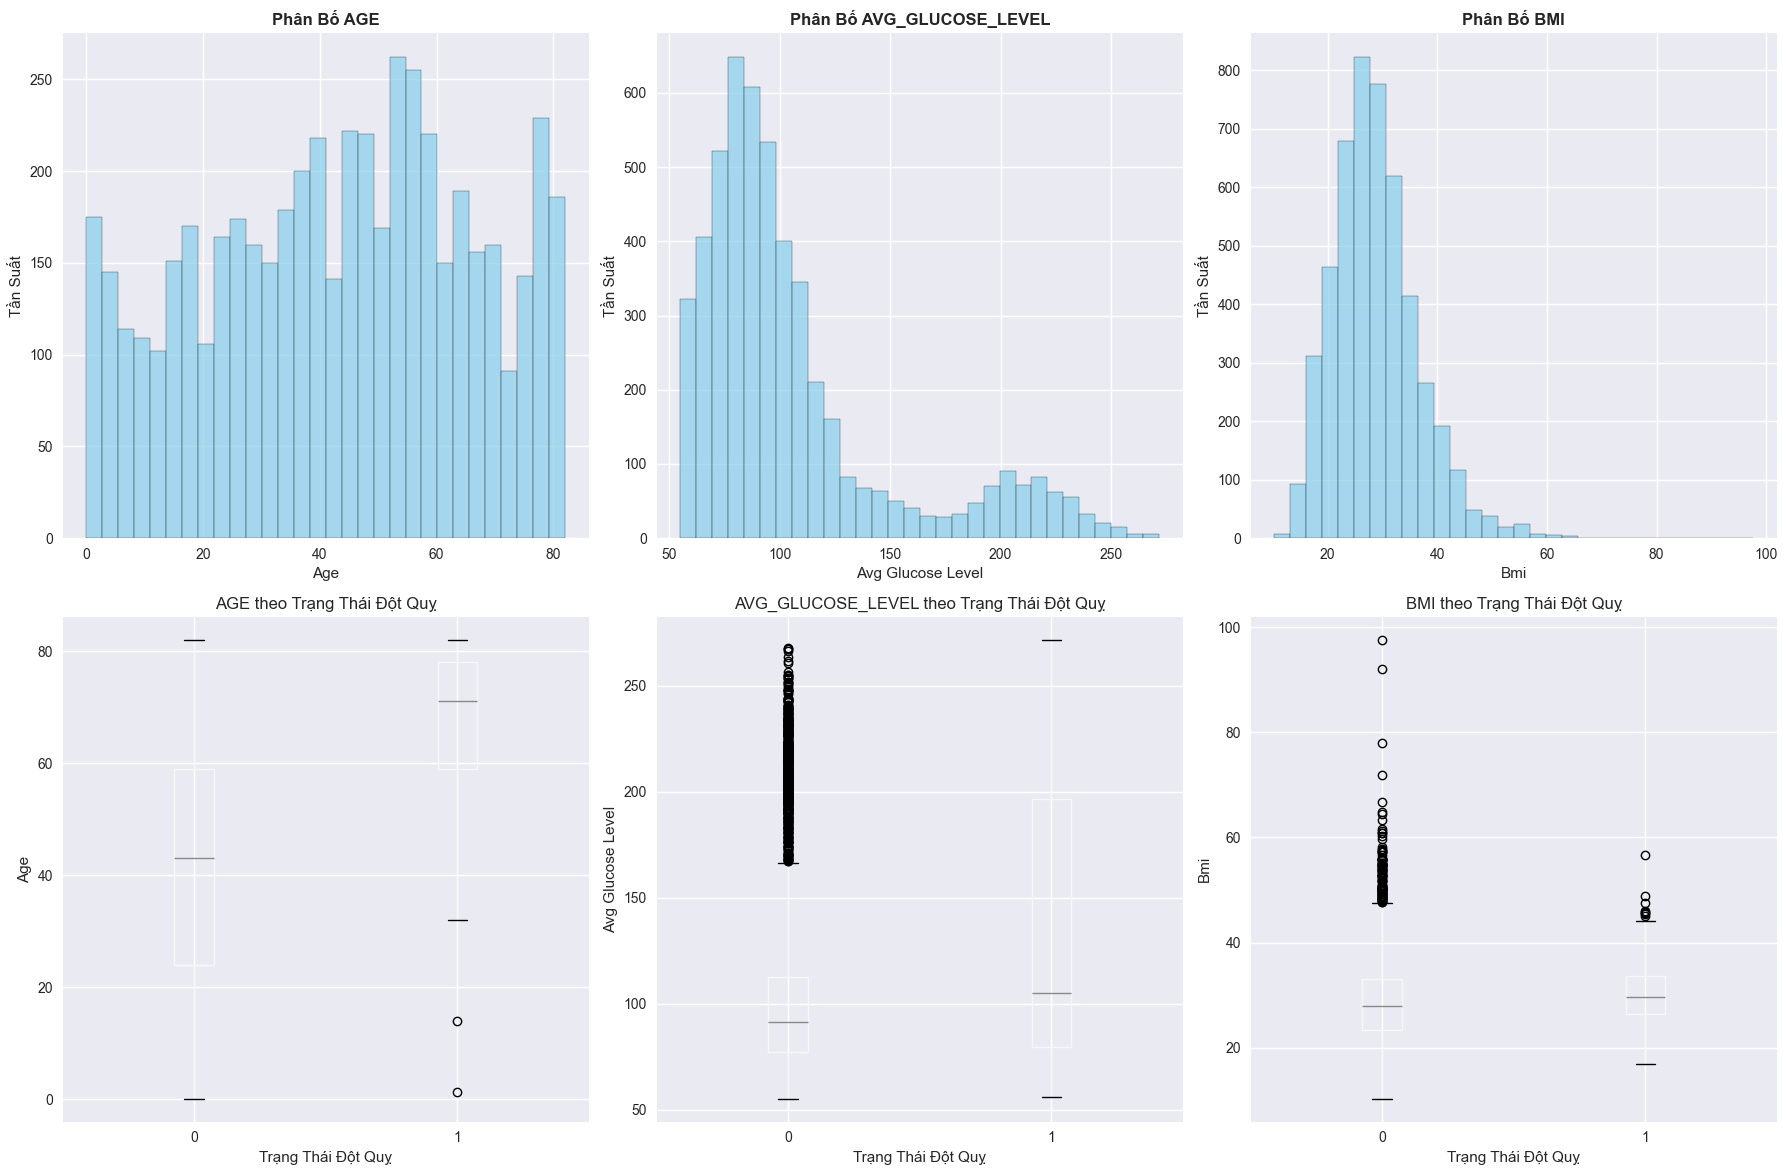

In [6]:
# Danh sách các biến số
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Phân tích phân bố các biến số
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[0, i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Phân Bố {col.upper()}', fontsize=12, fontweight='bold')
    axes[0, i].set_xlabel(col.replace('_', ' ').title())
    axes[0, i].set_ylabel('Tần Suất')
    
    # Boxplot theo stroke
    df.boxplot(column=col, by='stroke', ax=axes[1, i])
    axes[1, i].set_title(f'{col.upper()} theo Trạng Thái Đột Quỵ')
    axes[1, i].set_xlabel('Trạng Thái Đột Quỵ')
    axes[1, i].set_ylabel(col.replace('_', ' ').title())

plt.suptitle('')  # Xóa title mặc định của boxplot
plt.tight_layout()
plt.show()

## 5. Phân Tích Tương Quan

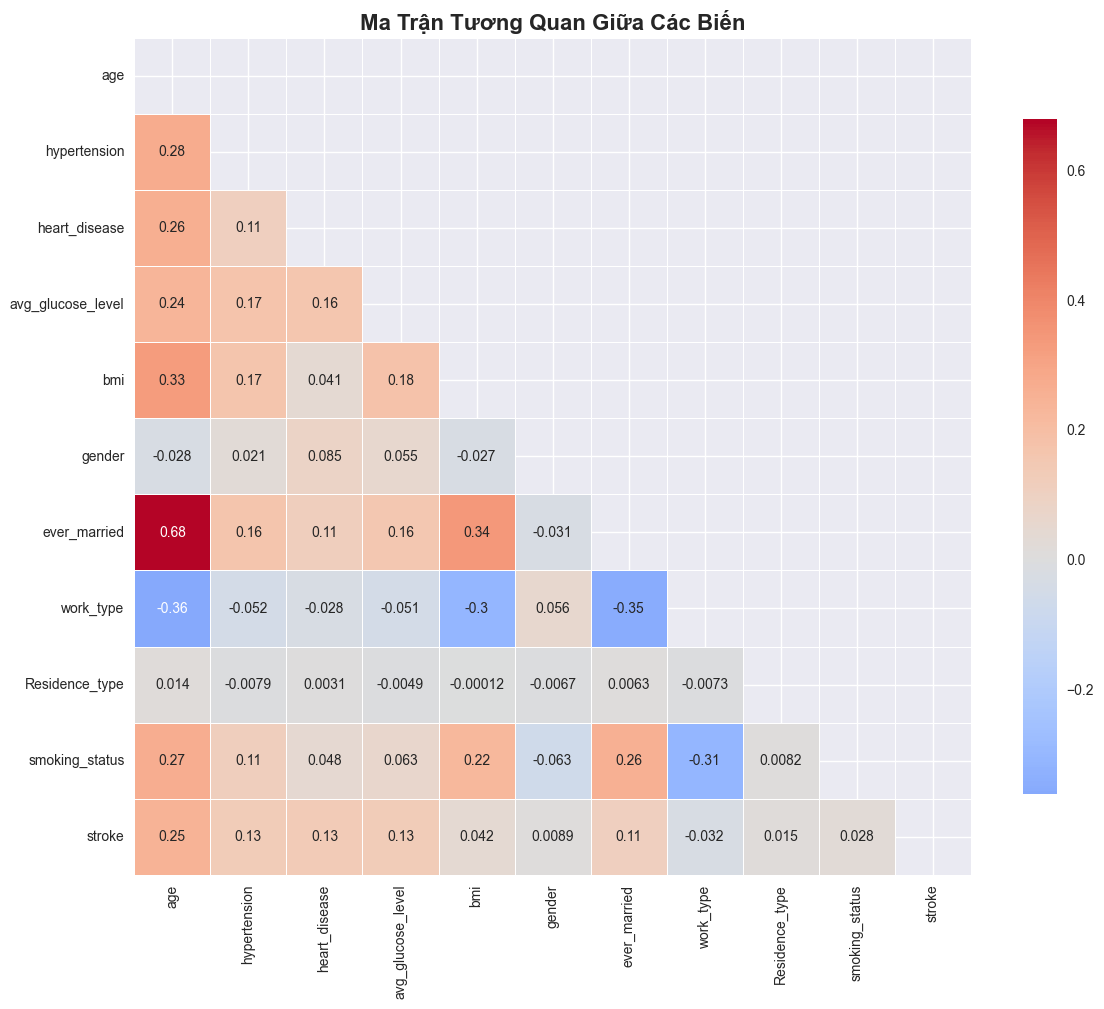


🎯 TƯƠNG QUAN VỚI BIẾN MỤC TIÊU (STROKE):
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64


In [7]:
# Tạo dataframe cho phân tích tương quan
# Mã hóa các biến phân loại
df_corr = df.copy()

# Label encoding cho các biến phân loại
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Thêm biến hypertension và heart_disease
correlation_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'] + categorical_cols + ['stroke']
df_corr_subset = df_corr[correlation_cols]

# Tính ma trận tương quan
correlation_matrix = df_corr_subset.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Ma Trận Tương Quan Giữa Các Biến', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tương quan với biến mục tiêu
stroke_correlation = correlation_matrix['stroke'].sort_values(ascending=False)
print("\n🎯 TƯƠNG QUAN VỚI BIẾN MỤC TIÊU (STROKE):")
print(stroke_correlation)

## 6. Phân Tích Missing Values

❌ MISSING VALUES TRONG DATASET:
   Cột  Số Missing  Tỷ Lệ (%)
9  bmi         201   3.933464


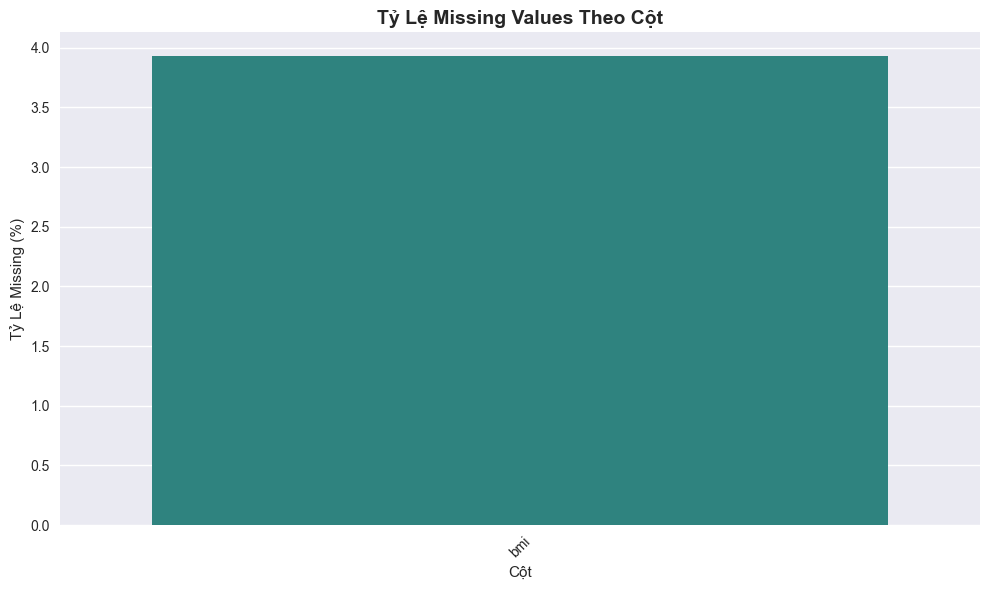


⚠️ Số giá trị 'N/A' trong cột BMI: 0 (0.00%)


In [8]:
# Kiểm tra missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Cột': missing_data.index,
    'Số Missing': missing_data.values,
    'Tỷ Lệ (%)': missing_percent.values
})

missing_df = missing_df[missing_df['Số Missing'] > 0].sort_values('Số Missing', ascending=False)

print("❌ MISSING VALUES TRONG DATASET:")
if len(missing_df) > 0:
    print(missing_df)
    
    # Visualization missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df, x='Cột', y='Tỷ Lệ (%)', palette='viridis')
    plt.title('Tỷ Lệ Missing Values Theo Cột', fontsize=14, fontweight='bold')
    plt.xlabel('Cột')
    plt.ylabel('Tỷ Lệ Missing (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Không có missing values trong dataset!")

# Kiểm tra giá trị 'N/A' trong cột bmi
na_count = (df['bmi'] == 'N/A').sum()
print(f"\n⚠️ Số giá trị 'N/A' trong cột BMI: {na_count} ({na_count/len(df)*100:.2f}%)")

## 7. Phân Tích Theo Nhóm Tuổi

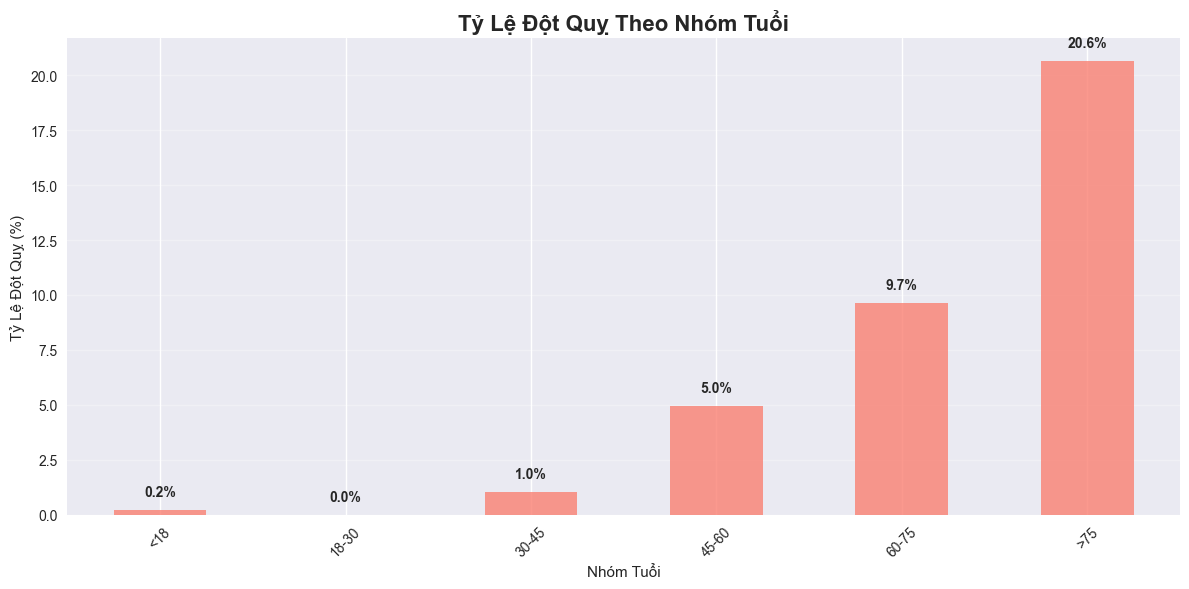


👥 TỶ LỆ ĐỘT QUỴ THEO NHÓM TUỔI:
stroke              0          1
age_group                       
<18         99.781659   0.218341
18-30      100.000000   0.000000
30-45       98.950382   1.049618
45-60       95.033670   4.966330
60-75       90.345650   9.654350
>75         79.354839  20.645161


In [9]:
# Tạo nhóm tuổi
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 18, 30, 45, 60, 75, 100], 
                        labels=['<18', '18-30', '30-45', '45-60', '60-75', '>75'])

# Phân tích tỷ lệ đột quỵ theo nhóm tuổi
age_stroke = pd.crosstab(df['age_group'], df['stroke'], normalize='index') * 100

plt.figure(figsize=(12, 6))
age_stroke[1].plot(kind='bar', color='salmon', alpha=0.8)
plt.title('Tỷ Lệ Đột Quỵ Theo Nhóm Tuổi', fontsize=16, fontweight='bold')
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Tỷ Lệ Đột Quỵ (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị lên các cột
for i, v in enumerate(age_stroke[1]):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n👥 TỶ LỆ ĐỘT QUỴ THEO NHÓM TUỔI:")
print(age_stroke)

## 8. Kết Luận EDA

In [10]:
print("""📋 KẾT LUẬN KHÁM PHÁ DỮ LIỆU:

🎯 DATASET OVERVIEW:
- Tổng số mẫu: 5,110 bệnh nhân
- Tỷ lệ đột quỵ: 4.87% (249 ca)
- Dữ liệu mất cân bằng nghiêm trọng (1:19.5)

🔍 CÁC YẾU TỐ NGUY CƠ CHÍNH:
1. Tuổi tác: Nguy cơ tăng mạnh sau 60 tuổi
2. Tăng huyết áp: Yếu tố nguy cơ quan trọng
3. Bệnh tim mạch: Liên quan mạnh với đột quỵ
4. Mức glucose cao: Có thể liên quan đến tiểu đường
5. Tình trạng hôn nhân: Người đã kết hôn có nguy cơ cao hơn

⚠️ VẤN ĐỀ CẦN XỬ LÝ:
- Giá trị 'N/A' trong cột BMI cần được xử lý
- Dữ liệu mất cân bằng cần áp dụng kỹ thuật resampling
- Cần feature engineering cho các biến phân loại

📈 HƯỚNG PHÁT TRIỂN:
- Tiền xử lý dữ liệu và feature engineering
- Áp dụng các thuật toán ML phù hợp với dữ liệu mất cân bằng
- Sử dụng metrics phù hợp (Precision, Recall, F1-score, AUC-ROC)
""")

📋 KẾT LUẬN KHÁM PHÁ DỮ LIỆU:

🎯 DATASET OVERVIEW:
- Tổng số mẫu: 5,110 bệnh nhân
- Tỷ lệ đột quỵ: 4.87% (249 ca)
- Dữ liệu mất cân bằng nghiêm trọng (1:19.5)

🔍 CÁC YẾU TỐ NGUY CƠ CHÍNH:
1. Tuổi tác: Nguy cơ tăng mạnh sau 60 tuổi
2. Tăng huyết áp: Yếu tố nguy cơ quan trọng
3. Bệnh tim mạch: Liên quan mạnh với đột quỵ
4. Mức glucose cao: Có thể liên quan đến tiểu đường
5. Tình trạng hôn nhân: Người đã kết hôn có nguy cơ cao hơn

⚠️ VẤN ĐỀ CẦN XỬ LÝ:
- Giá trị 'N/A' trong cột BMI cần được xử lý
- Dữ liệu mất cân bằng cần áp dụng kỹ thuật resampling
- Cần feature engineering cho các biến phân loại

📈 HƯỚNG PHÁT TRIỂN:
- Tiền xử lý dữ liệu và feature engineering
- Áp dụng các thuật toán ML phù hợp với dữ liệu mất cân bằng
- Sử dụng metrics phù hợp (Precision, Recall, F1-score, AUC-ROC)

